In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### CIFAR10 dataset
* 60,000 color images
* 10 classes
* 6,000 images in each class
* 50,000 training
* 10,000 testing

[tf.keras.datasets.cifar10.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images.astype('float32'), test_images.astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Verify Data

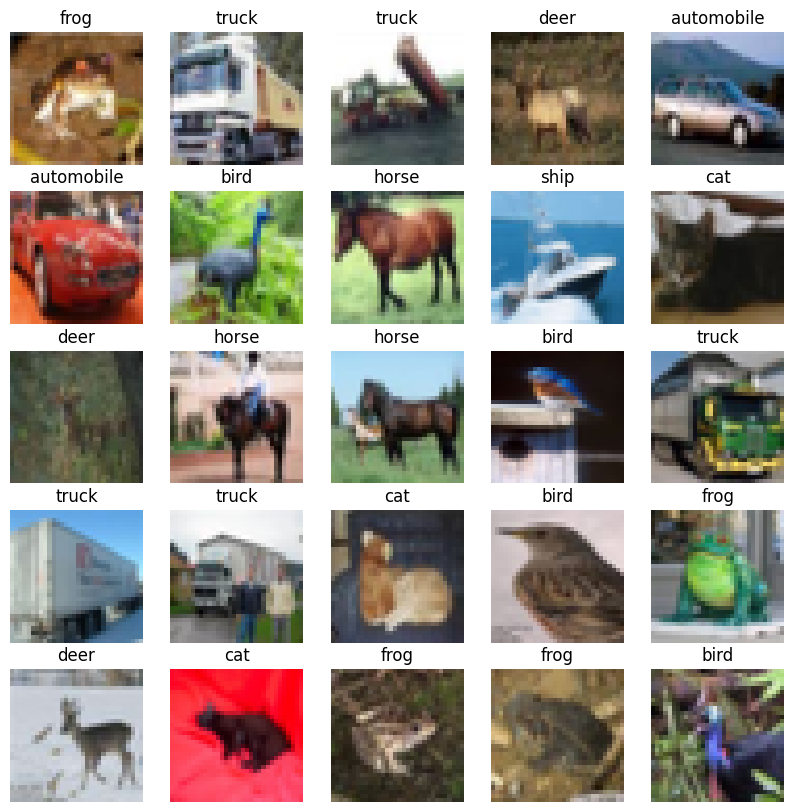

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis(False)

#### Create the model

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

* The width and height dimensions tend to shrink as you go deeper in the network

#### Compile and train the model

In [6]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 1.5186 - accuracy: 0.4450 - val_loss: 1.2503 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1499 - accuracy: 0.5911 - val_loss: 1.0699 - val_accuracy: 0.6259
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0045 - accuracy: 0.6483 - val_loss: 0.9971 - val_accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9134 - accuracy: 0.6828 - val_loss: 0.9538 - val_accuracy: 0.6699
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8433 - accuracy: 0.7065 - val_loss: 0.8861 - val_accuracy: 0.6962
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7841 - accuracy: 0.7282 - val_loss: 0.9389 - val_accuracy: 0.6764
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7309 - accuracy: 0.7441 - val_loss: 0.8600 - val_ac

#### Evaluate the model

313/313 - 1s - loss: 0.8951 - accuracy: 0.7042 - 1s/epoch - 4ms/step


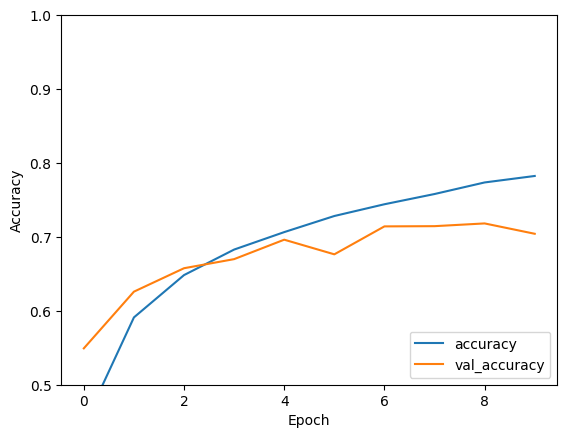

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(test_accuracy)

0.704200029373169
